In [ ]:
pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3162676 sha256=95e66caa2a5b060524c3315de3ed7eacbf984716791b11fc8b2874c7e11f4c4e
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [ ]:
import pandas as pd
from surprise import Dataset, Reader
from surprise.model_selection import train_test_split
from surprise import SVD
from surprise import accuracy
from surprise.model_selection import cross_validate

In [ ]:
filtered_data = pd.read_csv("filtered_data.csv")

In [ ]:
reader = Reader(rating_scale=(0.5, 5))
data = Dataset.load_from_df(filtered_data[['userId', 'movieId', 'rating']], reader)
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

#define the model
model = SVD()
model.fit(trainset)

#Predictions and rmse
predictions = model.test(testset)
rmse = accuracy.rmse(predictions)

def recommend_movies(user_id, top_n=10):
    #For each movie, it checks whether the model knows about the user or if the user has any ratings in the training set.
    items_to_recommend = []
    for movie_id in filtered_data['movieId'].unique():
        if not trainset.knows_user(user_id) or trainset.ur[trainset.to_inner_uid(user_id)]:
            prediction = model.predict(user_id, movie_id)
            items_to_recommend.append((movie_id, prediction.est))

    items_to_recommend.sort(key=lambda x: x[1], reverse=True)

    print(f'Top {top_n} recommended items for user {user_id}:')
    for i, (movie_id, estimated_rating) in enumerate(items_to_recommend[:top_n], start=1):
        movie_name = filtered_data.loc[filtered_data['movieId'] == movie_id, 'title'].values[0]
        print(f'{i}. Movie ID: {movie_id}, Movie Name: {movie_name}, Estimated Rating: {estimated_rating}')



RMSE: 0.8295
RMSE: 0.8295364105306304


In [ ]:
# Example
user_id_to_recommend = 3
recommend_movies(user_id_to_recommend)

Top 10 recommended items for user 3:
1. Movie ID: 1197, Movie Name: Princess Bride, The (1987), Estimated Rating: 3.7076283466350217
2. Movie ID: 1213, Movie Name: Goodfellas (1990), Estimated Rating: 3.693600760287749
3. Movie ID: 2959, Movie Name: Fight Club (1999), Estimated Rating: 3.6917663313621736
4. Movie ID: 750, Movie Name: Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1964), Estimated Rating: 3.676404524993106
5. Movie ID: 778, Movie Name: Trainspotting (1996), Estimated Rating: 3.6655989176829777
6. Movie ID: 50, Movie Name: Usual Suspects, The (1995), Estimated Rating: 3.650659077149274
7. Movie ID: 318, Movie Name: Shawshank Redemption, The (1994), Estimated Rating: 3.603595004094876
8. Movie ID: 109487, Movie Name: Interstellar (2014), Estimated Rating: 3.577255090938572
9. Movie ID: 2324, Movie Name: Life Is Beautiful (La Vita è bella) (1997), Estimated Rating: 3.5698405502086032
10. Movie ID: 4973, Movie Name: Amelie (Fabuleux destin d'Amélie Po

In [ ]:
# Example
user_id_to_recommend = 610
recommend_movies(user_id_to_recommend)

Top 10 recommended items for user 610:
1. Movie ID: 750, Movie Name: Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1964), Estimated Rating: 4.935144264641526
2. Movie ID: 778, Movie Name: Trainspotting (1996), Estimated Rating: 4.9117317155838425
3. Movie ID: 6016, Movie Name: City of God (Cidade de Deus) (2002), Estimated Rating: 4.860503377465877
4. Movie ID: 1199, Movie Name: Brazil (1985), Estimated Rating: 4.815989247110429
5. Movie ID: 2959, Movie Name: Fight Club (1999), Estimated Rating: 4.81428091474378
6. Movie ID: 541, Movie Name: Blade Runner (1982), Estimated Rating: 4.808265243572251
7. Movie ID: 1201, Movie Name: Good, the Bad and the Ugly, The (Buono, il brutto, il cattivo, Il) (1966), Estimated Rating: 4.7848119914339895
8. Movie ID: 260, Movie Name: Star Wars: Episode IV - A New Hope (1977), Estimated Rating: 4.779797989330977
9. Movie ID: 858, Movie Name: Godfather, The (1972), Estimated Rating: 4.773711699629781
10. Movie ID: 1208, Movie Name

In [ ]:
recommend_movies(89)

Top 10 recommended items for user 89:
1. Movie ID: 2324, Movie Name: Life Is Beautiful (La Vita è bella) (1997), Estimated Rating: 3.4653265656064622
2. Movie ID: 750, Movie Name: Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1964), Estimated Rating: 3.4406996889413985
3. Movie ID: 318, Movie Name: Shawshank Redemption, The (1994), Estimated Rating: 3.3955912179950527
4. Movie ID: 51255, Movie Name: Hot Fuzz (2007), Estimated Rating: 3.3571479870329384
5. Movie ID: 81845, Movie Name: King's Speech, The (2010), Estimated Rating: 3.2923991230301395
6. Movie ID: 912, Movie Name: Casablanca (1942), Estimated Rating: 3.2380910403361813
7. Movie ID: 58559, Movie Name: Dark Knight, The (2008), Estimated Rating: 3.212965088899166
8. Movie ID: 1199, Movie Name: Brazil (1985), Estimated Rating: 3.2031718253734134
9. Movie ID: 6711, Movie Name: Lost in Translation (2003), Estimated Rating: 3.188878060511269
10. Movie ID: 904, Movie Name: Rear Window (1954), Estimated Ratin

In [ ]:
algo = SVD()
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

# Train the model on the entire dataset
trainset = data.build_full_trainset()
algo.fit(trainset)

# Make predictions for all user-item pairs
testset = trainset.build_anti_testset()
predictions = algo.test(testset)
rmse = accuracy.rmse(predictions)


Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8316  0.8331  0.8460  0.8398  0.8307  0.8362  0.0058  
MAE (testset)     0.6340  0.6369  0.6462  0.6412  0.6337  0.6384  0.0047  
Fit time          0.52    0.51    0.52    0.52    0.49    0.51    0.01    
Test time         0.12    0.04    0.05    0.06    0.05    0.06    0.03    
RMSE: 0.5516
RMSE: 0.5515697493009846


In [ ]:
# Get top recommendations for a user
def get_top_n(predictions, n=10):
    top_n = {}
    for uid, iid, true_r, est, _ in predictions:
        if uid not in top_n:
            top_n[uid] = []
        top_n[uid].append((iid, est))
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]
    return top_n

#get recommendations for all users
top_n = get_top_n(predictions, n=10)
for uid, user_ratings in top_n.items():
    print(uid, [iid for (iid, _) in user_ratings])


1 [318, 750, 7361, 1193, 912, 4995, 4993, 7153, 58559, 1387]
2 [904, 1198, 593, 541, 912, 1196, 296, 1207, 1197, 1219]
3 [1252, 6377, 750, 908, 1136, 1199, 58559, 1148, 318, 858]
4 [1387, 4973, 6377, 1148, 318, 527, 1270, 48774, 48516, 58559]
5 [1201, 1193, 750, 1199, 1252, 6016, 1214, 904, 541, 3147]
6 [912, 2324, 91529, 58559, 79132, 1704, 1207, 1252, 1234, 112852]
7 [1276, 912, 1148, 6016, 608, 1252, 904, 1089, 1197, 58559]
8 [904, 1197, 1193, 2324, 750, 6711, 1221, 2959, 858, 6016]
9 [912, 858, 4226, 318, 908, 7153, 1136, 750, 296, 1221]
10 [750, 1252, 1197, 1203, 5618, 1199, 76093, 4973, 318, 1276]
11 [1136, 1222, 58559, 79132, 5618, 46578, 1089, 1219, 6016, 904]
12 [527, 318, 2324, 2959, 912, 2028, 296, 904, 858, 1222]
13 [318, 2324, 858, 6016, 58559, 1276, 2959, 750, 50, 296]
14 [1252, 7153, 1278, 5618, 2571, 1394, 58559, 1136, 1213, 2959]
15 [1208, 2324, 608, 1207, 1089, 110, 1201, 50, 1197, 1617]
16 [48516, 908, 2324, 4995, 6016, 112852, 1221, 1278, 6874, 1225]
17 [2324, 4973,

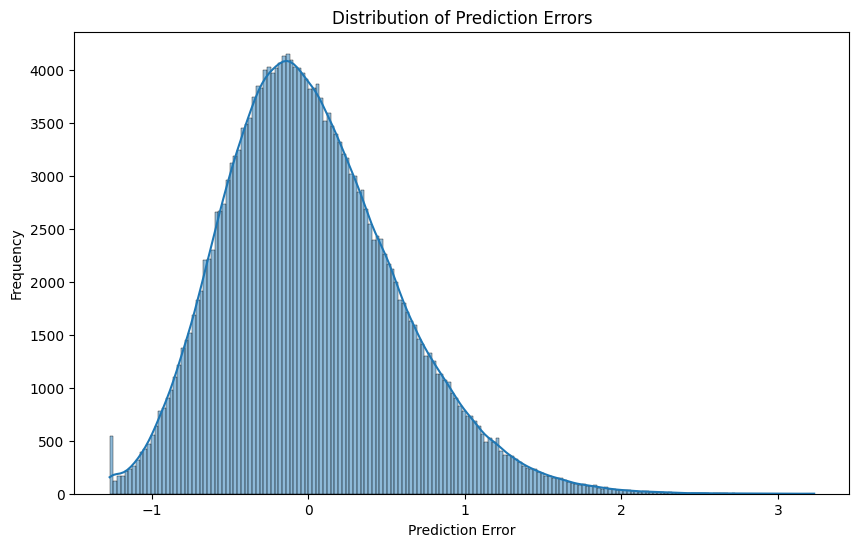

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from surprise import Dataset, Reader, SVD
from surprise.model_selection import cross_validate

# Plotting the distribution of errors
errors = [(true_r - est) for uid, iid, true_r, est, _ in predictions]
plt.figure(figsize=(10, 6))
sns.histplot(errors, kde=True)
plt.title('Distribution of Prediction Errors')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.show()